In [1]:
# prompt: saya ingin memanggil data barcelona.csv yang telah saya unggah

import pandas as pd

# Ganti 'Prabowo.csv' dengan nama file yang sesuai jika berbeda
barcelona = pd.read_csv('barcelona.csv')

# Menampilkan beberapa baris pertama data untuk verifikasi
print(barcelona.head())

   conversation_id_str                      created_at  favorite_count  \
0  1902408349641040168  Wed Mar 19 17:14:30 +0000 2025           17574   
1  1902253903099383953  Wed Mar 19 07:00:47 +0000 2025           28501   
2  1901619534185759187  Mon Mar 17 13:00:01 +0000 2025           36039   
3  1901397428265525404  Sun Mar 16 22:17:27 +0000 2025           46684   
4  1902436360914702616  Wed Mar 19 19:05:48 +0000 2025           34312   

                                           full_text               id_str  \
0  🇵🇱 Two Poles who score a lot of goals. https:/...  1902408349641040168   
1  This is what Barcelona needs https://t.co/nElU...  1902253903099383953   
2  When life is even better after retirement. htt...  1901619534185759187   
3       THIS. IS. BARCELONA. https://t.co/1D9pAYRY0f  1901397428265525404   
4  Big games. Big wins. Big Barça. A thread https...  1902436360914702616   

                                         image_url in_reply_to_screen_name  \
0  https://pbs

In [2]:
barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      251 non-null    int64 
 1   created_at               251 non-null    object
 2   favorite_count           251 non-null    int64 
 3   full_text                251 non-null    object
 4   id_str                   251 non-null    int64 
 5   image_url                228 non-null    object
 6   in_reply_to_screen_name  2 non-null      object
 7   lang                     251 non-null    object
 8   location                 186 non-null    object
 9   quote_count              251 non-null    int64 
 10  reply_count              251 non-null    int64 
 11  retweet_count            251 non-null    int64 
 12  tweet_url                251 non-null    object
 13  user_id_str              251 non-null    int64 
 14  username                 251 non-null    o

In [3]:
barcelona["full_text"]

,full_text
0,🇵🇱 Two Poles who score a lot of goals. https:/...
1,This is what Barcelona needs https://t.co/nElU...
2,When life is even better after retirement. htt...
3,THIS. IS. BARCELONA. https://t.co/1D9pAYRY0f
4,Big games. Big wins. Big Barça. A thread https...
...,...
246,The tools of the trade https://t.co/o1yQVNS64G
247,Barcelona s plan with Ansu Fati remains same ...
248,Respeten los rangos con huevos se ganan los pa...
249,Rodalies segueix sense garantir l'accessibilit...


In [4]:
#membuat function cleaning

import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

In [5]:
#membuat sebuah variabel baru untuk menyimpan data hasil cleaning

barcelona["text_clean"] = ''

In [6]:
#Pembersihan text dari symbol
for i, row in barcelona.iterrows():
    barcelona.at[i, "text_clean"] = clean(row.full_text)

In [7]:
barcelona.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,text_clean
0,1902408349641040168,Wed Mar 19 17:14:30 +0000 2025,17574,🇵🇱 Two Poles who score a lot of goals. https:/...,1902408349641040168,https://pbs.twimg.com/media/Gma13jea8AQaLrn.jpg,NaN,en,BARÇA STORE,22,98,587,https://x.com/FCBarcelona/status/1902408349641...,96951800,FCBarcelona,🇵🇱 Two Poles who score a lot of goals.
1,1902253903099383953,Wed Mar 19 07:00:47 +0000 2025,28501,This is what Barcelona needs https://t.co/nElU...,1902253903099383953,https://pbs.twimg.com/media/GmYp1pdWMAAXdvp.jpg,NaN,en,Pain.𝕏 Headquarters,105,192,939,https://x.com/GBarca_/status/1902253903099383953,1681057761902116864,GBarca_,This is what Barcelona needs
2,1901619534185759187,Mon Mar 17 13:00:01 +0000 2025,36039,When life is even better after retirement. htt...,1901619534185759187,https://pbs.twimg.com/media/GmPl4SNXwAAPDb1.jpg,NaN,en,BARÇA STORE,14,137,1429,https://x.com/FCBarcelona/status/1901619534185...,96951800,FCBarcelona,When life is even better after retirement.
3,1901397428265525404,Sun Mar 16 22:17:27 +0000 2025,46684,THIS. IS. BARCELONA. https://t.co/1D9pAYRY0f,1901397428265525404,https://pbs.twimg.com/media/GmMe4WEbIAArfDo.jpg,NaN,en,NaN,97,410,2662,https://x.com/Hansiflickk/status/1901397428265...,1508160497341767680,Hansiflickk,THIS. IS. BARCELONA.
4,1902436360914702616,Wed Mar 19 19:05:48 +0000 2025,34312,Big games. Big wins. Big Barça. A thread https...,1902436360914702616,https://pbs.twimg.com/media/GmbPx2gW4AAAt-8.jpg,NaN,ht,BARÇA STORE,195,300,2132,https://x.com/FCBarcelona/status/1902436360914...,96951800,FCBarcelona,Big games. Big wins. Big Barça. A thread


In [8]:
barcelona[["full_text", "text_clean"]].head()

,full_text,text_clean
0,🇵🇱 Two Poles who score a lot of goals. https:/...,🇵🇱 Two Poles who score a lot of goals.
1,This is what Barcelona needs https://t.co/nElU...,This is what Barcelona needs
2,When life is even better after retirement. htt...,When life is even better after retirement.
3,THIS. IS. BARCELONA. https://t.co/1D9pAYRY0f,THIS. IS. BARCELONA.
4,Big games. Big wins. Big Barça. A thread https...,Big games. Big wins. Big Barça. A thread


In [9]:
pip install nltk

In [10]:
#tokenisasi
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [11]:
#Contoh tokenisasi
example_text = "Hello there, how are you doing today? The weather is great today. The sky is blue. python is awsome"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'python is awsome']
['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'python', 'is', 'awsome']


In [12]:
# prompt: saya ingin melakukan tokenisasi seperi syntax 23 untuk barcelona["text_clean"]

# Tokenisasi kata pada kolom 'text_clean'
barcelona['tokenized_text'] = barcelona['text_clean'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text
print(barcelona[['text_clean', 'tokenized_text']].head())

                                    text_clean  \
0      🇵🇱 Two Poles who score a lot of goals.    
1                This is what Barcelona needs    
2  When life is even better after retirement.    
3                        THIS. IS. BARCELONA.    
4    Big games. Big wins. Big Barça. A thread    

                                      tokenized_text  
0  [🇵🇱, Two, Poles, who, score, a, lot, of, goals...  
1                 [This, is, what, Barcelona, needs]  
2  [When, life, is, even, better, after, retireme...  
3                     [THIS, ., IS, ., BARCELONA, .]  
4  [Big, games, ., Big, wins, ., Big, Barça, ., A...  


In [13]:
barcelona["tokenized_text"].head()

,tokenized_text
0,"[🇵🇱, Two, Poles, who, score, a, lot, of, goals..."
1,"[This, is, what, Barcelona, needs]"
2,"[When, life, is, even, better, after, retireme..."
3,"[THIS, ., IS, ., BARCELONA, .]"
4,"[Big, games, ., Big, wins, ., Big, Barça, ., A..."


In [14]:
# prompt: saya ingin mengambil stopwords dalam bahasa indonesia

import nltk
nltk.download('stopwords')

# Mendapatkan daftar stopwords dalam bahasa Indonesia
from nltk.corpus import stopwords
stop_words_indonesia = stopwords.words('indonesian')

stop_words_indonesia

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [15]:
from nltk.corpus import stopwords
text = 'he is a good boy. he is very good in coding'
text = word_tokenize(text)
text_with_no_stopwords = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopwords

['good', 'boy', '.', 'good', 'coding']

In [16]:
# prompt: saya ingin melakukan stopwords di Puasa["tokenized_text"]

# Mendapatkan daftar stopwords dalam bahasa Indonesia
stop_words_indonesia = stopwords.words('indonesian')

# Fungsi untuk menghapus stopwords dari list token
def remove_stopwords(token_list):
  return [word for word in token_list if word.lower() not in stop_words_indonesia]

# Menerapkan fungsi remove_stopwords ke kolom 'tokenized_text'
barcelona['tokenized_stopwords'] = barcelona['tokenized_text'].apply(remove_stopwords)

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text_no_stopwords
barcelona[['tokenized_text', 'tokenized_stopwords']].head()

,tokenized_text,tokenized_stopwords
0,"[🇵🇱, Two, Poles, who, score, a, lot, of, goals...","[🇵🇱, Two, Poles, who, score, a, lot, of, goals..."
1,"[This, is, what, Barcelona, needs]","[This, is, what, Barcelona, needs]"
2,"[When, life, is, even, better, after, retireme...","[When, life, is, even, better, after, retireme..."
3,"[THIS, ., IS, ., BARCELONA, .]","[THIS, ., IS, ., BARCELONA, .]"
4,"[Big, games, ., Big, wins, ., Big, Barça, ., A...","[Big, games, ., Big, wins, ., Big, Barça, ., A..."


In [17]:
#Contoh Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()    ## Creating an object for porterstemmer
example_words = ['earn',"earning","earned","earns"]  ##Example words
for w in example_words:
    print(ps.stem(w))

earn
earn
earn
earn


In [18]:
# prompt: saya ingin melakukan stemming pada barcelona["tokenized_stopwords"] dalam bahasa indonesia

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [19]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat objek stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada list token
def stemming_sastrawi(token_list):
  return [stemmer.stem(word) for word in token_list]

# Terapkan fungsi stemming_sastrawi ke kolom 'tokenized_stopwords'
barcelona['stemmed_words'] = barcelona['tokenized_stopwords'].apply(stemming_sastrawi)

# Menampilkan beberapa baris pertama data dengan kolom stemmed_words
barcelona[['tokenized_stopwords', 'stemmed_words']]

,tokenized_stopwords,stemmed_words
0,"[🇵🇱, Two, Poles, who, score, a, lot, of, goals...","[, two, poles, who, score, a, lot, of, goals, ]"
1,"[This, is, what, Barcelona, needs]","[this, is, what, barcelona, needs]"
2,"[When, life, is, even, better, after, retireme...","[when, life, is, even, better, after, retireme..."
3,"[THIS, ., IS, ., BARCELONA, .]","[this, , is, , barcelona, ]"
4,"[Big, games, ., Big, wins, ., Big, Barça, ., A...","[big, games, , big, wins, , big, bar a, , a, t..."
...,...,...
246,"[The, tools, of, the, trade]","[the, tools, of, the, trade]"
247,"[Barcelona, s, plan, with, Ansu, Fati, remains...","[barcelona, s, plan, with, ansu, fati, remains..."
248,"[Respeten, los, rangos, con, huevos, ganan, lo...","[respeten, los, rangos, con, huevos, ganan, lo..."
249,"[Rodalies, segueix, sense, garantir, l'accessi...","[rodalies, segueix, sense, garantir, l accessi..."


In [20]:
# prompt: berikan saya syntax untuk membuat analisis sentimen untuk variabel stemmed_words

!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi objek SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text_list):
    # Gabungkan list token menjadi satu string
    text = " ".join(text_list)

    # Lakukan analisis sentimen
    scores = analyzer.polarity_scores(text)

    # Kembalikan nilai compound score
    return scores['compound']

# Terapkan fungsi analyze_sentiment ke kolom 'stemmed_words'
barcelona['sentiment_score'] = barcelona['stemmed_words'].apply(analyze_sentiment)

In [22]:
# Menampilkan beberapa baris pertama data dengan kolom sentiment_score
print(barcelona[['stemmed_words', 'sentiment_score']].head())

                                       stemmed_words  sentiment_score
0    [, two, poles, who, score, a, lot, of, goals, ]           0.0000
1                 [this, is, what, barcelona, needs]           0.0000
2  [when, life, is, even, better, after, retireme...           0.4404
3                        [this, , is, , barcelona, ]           0.0000
4  [big, games, , big, wins, , big, bar a, , a, t...           0.5719


In [23]:
# Membuat label setiap komentar

# Fungsi untuk menentukan label sentimen berdasarkan sentiment_score
def label_sentiment(score):
    if score < 0:
        return 'negatif'
    elif score == 0:
        return 'netral'
    else:
        return 'positif'

# Buat kolom baru 'sentiment_label' berdasarkan kolom 'sentiment_score'
barcelona['sentiment_label'] = barcelona['sentiment_score'].apply(label_sentiment)

# Menampilkan beberapa baris pertama data dengan kolom sentiment_label
print(barcelona[['stemmed_words', 'sentiment_score', 'sentiment_label']].head())

                                       stemmed_words  sentiment_score  \
0    [, two, poles, who, score, a, lot, of, goals, ]           0.0000   
1                 [this, is, what, barcelona, needs]           0.0000   
2  [when, life, is, even, better, after, retireme...           0.4404   
3                        [this, , is, , barcelona, ]           0.0000   
4  [big, games, , big, wins, , big, bar a, , a, t...           0.5719   

  sentiment_label  
0          netral  
1          netral  
2         positif  
3          netral  
4         positif  


In [24]:
!pip install seaborn

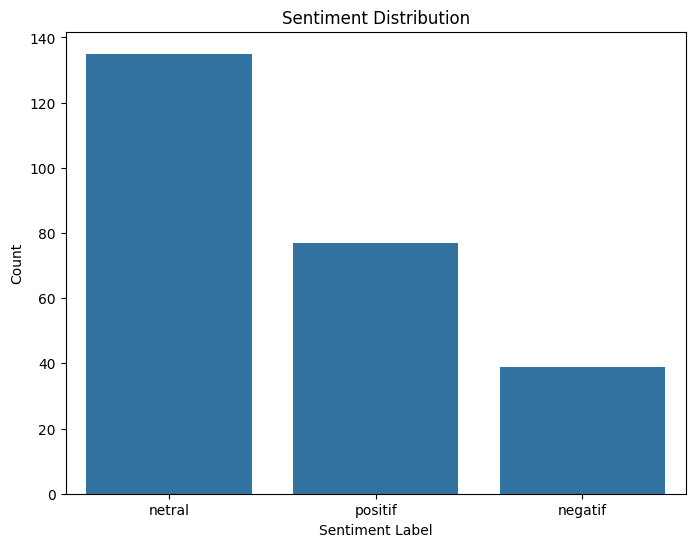

In [26]:
#Membuat grafik plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=barcelona)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

In [27]:
# prompt: Buat word cloud dari setiap kategori

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

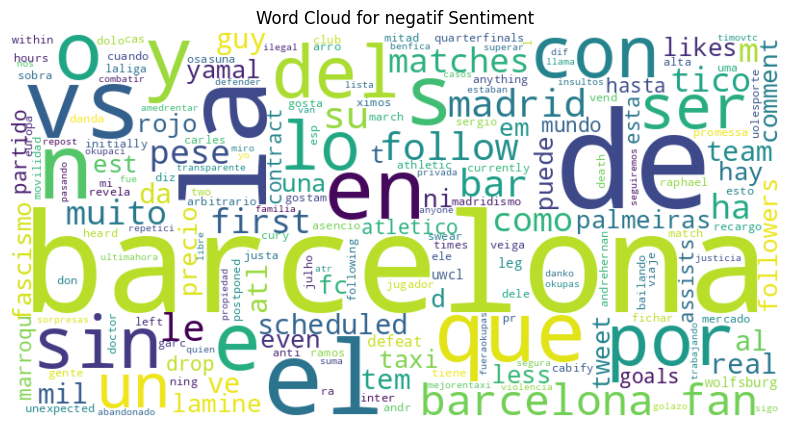

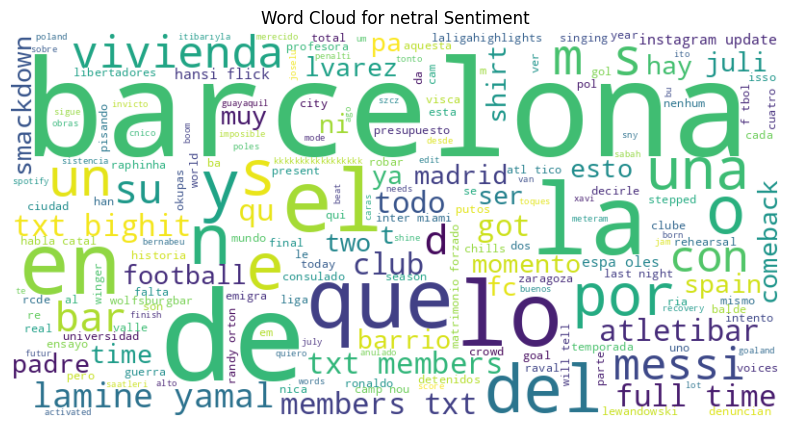

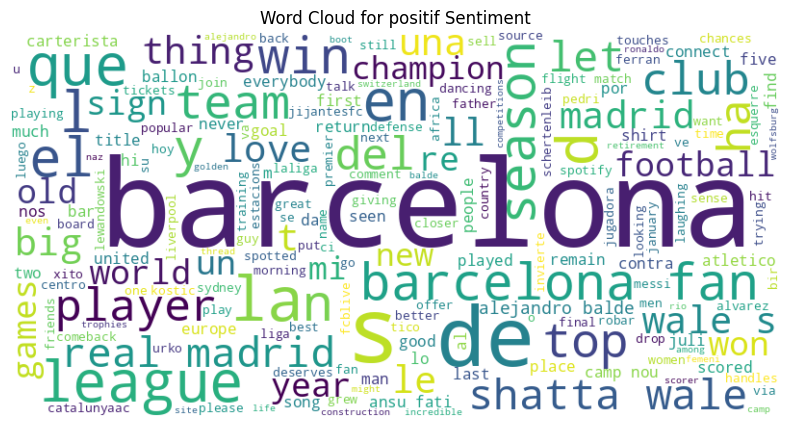

In [28]:
# Group data by sentiment label
sentiment_groups = barcelona.groupby('sentiment_label')

# Create word clouds for each sentiment category
for sentiment, group in sentiment_groups:
    # Combine all stemmed words in the group
    all_words = ' '.join([' '.join(words) for words in group['stemmed_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()